In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [271]:
df = pd.read_csv("D:/FCDS/Machine Learning/Assignment/student_performance_data.csv")  
df.head()


,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [272]:
df.drop(columns=['StudentID'], inplace=True)

In [273]:
df

,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,Male,24,37,90.75,3.47,Arts,Yes,No
1,Female,22,37,74.90,2.32,Education,No,No
2,Male,22,10,53.36,2.38,Business,No,No
3,Male,24,10,70.26,3.46,Science,Yes,No
4,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...
495,Male,22,37,76.61,2.97,Science,No,No
496,Male,23,11,56.29,3.20,Science,No,No
497,Female,20,6,56.64,3.20,Science,No,Yes
498,Male,22,18,57.18,2.05,Business,No,Yes


In [274]:
# categorical columns that need to be label encoded
label_cols = ['Gender', 'Major', 'PartTimeJob', 'ExtraCurricularActivities']

# Apply label encoding to each categorical column
for col in label_cols:
    # This converts categorical text values into numerical labels
    df[col] = LabelEncoder().fit_transform(df[col])

# binary target variable from GPA:
# - 1 represents 'Pass' (GPA >= 2.5)
# - 0 represents 'Fail' (GPA < 2.5)
df['Target'] = df['GPA'].apply(lambda x: 1 if x >= 2.5 else 0)

# Drop the original GPA column since we've created our target variable
# prevents the model from using the original GPA as a feature
df.drop(columns=['GPA'], inplace=True)

In [275]:
df

,Gender,Age,StudyHoursPerWeek,AttendanceRate,Major,PartTimeJob,ExtraCurricularActivities,Target
0,1,24,37,90.75,0,1,0,1
1,0,22,37,74.90,2,0,0,0
2,1,22,10,53.36,1,0,0,0
3,1,24,10,70.26,4,1,0,1
4,1,18,19,74.87,2,1,0,0
...,...,...,...,...,...,...,...,...
495,1,22,37,76.61,4,0,0,1
496,1,23,11,56.29,4,0,0,1
497,0,20,6,56.64,4,0,1,1
498,1,22,18,57.18,1,0,1,0


In [276]:
X = df.drop('Target', axis=1)
y = df['Target']
y.value_counts(normalize= True)

# 60% Train, 20% Validation, 20% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)


In [277]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [278]:
print(X_train.shape)
print(y_train.shape)


(300, 7)
(300,)


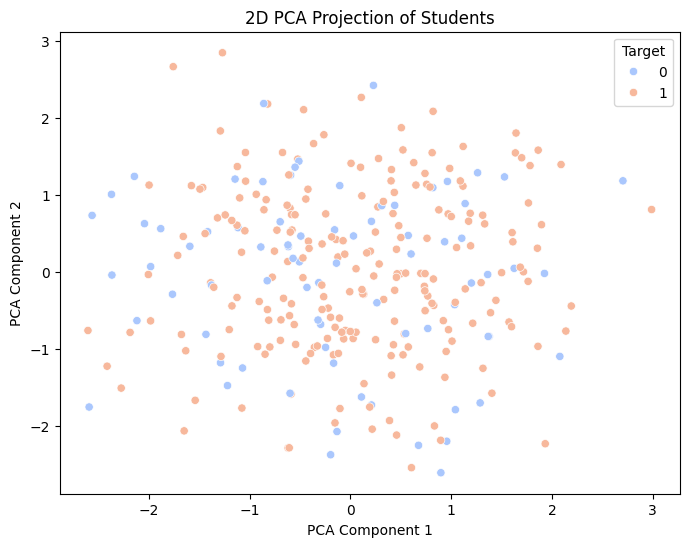

In [279]:
# PCA 2D Visualization (Bonus)
pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_pca[:,0], y=X_train_pca[:,1], hue=y_train, palette='coolwarm') # reduce high dimention data to 2d 
plt.title("2D PCA Projection of Students")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


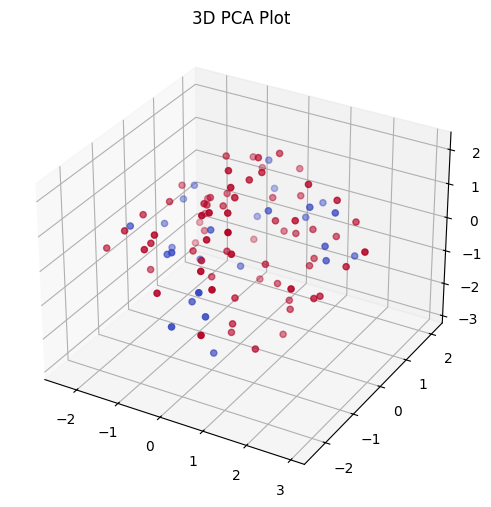

In [280]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3) 
X_pca_3d = pca.fit_transform(X_test)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d') # reduce high dimention data to 3d 
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_test, cmap='coolwarm')
ax.set_title('3D PCA Plot')
plt.show()


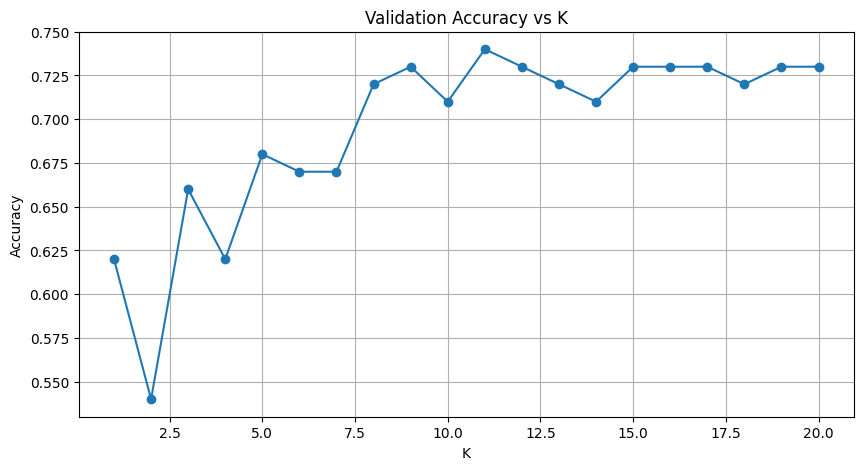

Best K: 11


In [281]:
# KNN Hyperparameter Tuning
val_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    val_score = knn.score(X_val_pca, y_val)
    val_scores.append(val_score)

# Plot K vs Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(k_values, val_scores, marker='o')
plt.title("Validation Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

best_k = k_values[np.argmax(val_scores)] # return index of the maximum value in an array
print(f"Best K: {best_k}")


In [282]:
#Final KNN Model Evaluation
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Confusion Matrix:
 [[ 0 26]
 [ 3 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.73      0.96      0.83        74

    accuracy                           0.71       100
   macro avg       0.37      0.48      0.42       100
weighted avg       0.54      0.71      0.61       100



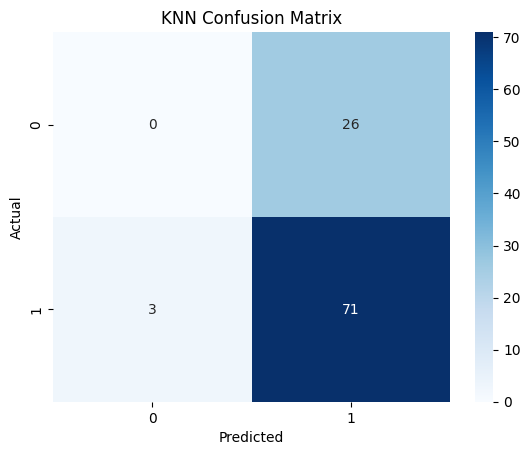

In [283]:
# Heatmap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Blues', fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [284]:
# Cross-Validation (5-Fold) (cv)
cv_model = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(cv_model, X_train_val, y_train_val, cv=5) 

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.7375 0.7875 0.725  0.7125 0.7625]
Average CV Accuracy: 0.74


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.74      1.00      0.85        74

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



c:\Users\Elzoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elzoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Elzoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

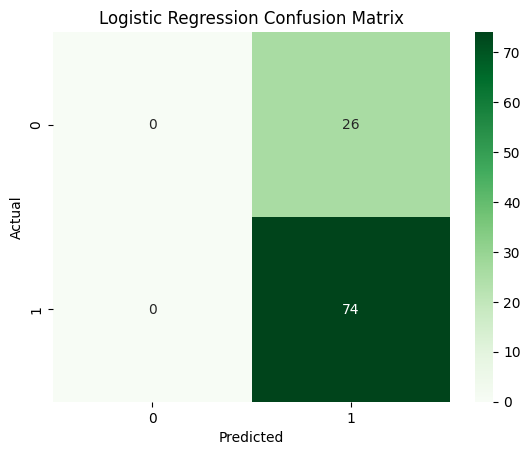

In [285]:
# Logistic Regression Comparison ( Bonus)
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)
y_pred_lr = log_reg.predict(X_test_pca)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Greens', fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Overfitting Discussion
print("Train Accuracy (KNN):", knn.score(X_train_pca, y_train))
print("Validation Accuracy (KNN):", knn.score(X_val_pca, y_val))
print("Test Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))


Train Accuracy (KNN): 0.75
Validation Accuracy (KNN): 0.74
Test Accuracy (KNN): 0.71
